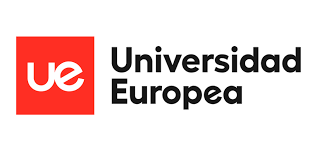


 #                                           Información de Distritos y Barrios del Municipio de Madrid


PRESENTADA POR: Alicia Ruiz Moreno 

In [2]:
import pandas as pd

- Lectura del dataset

In [2]:
data = pd.read_csv('barrios_municipio_madrid.csv', encoding='latin-1', sep=';')

In [3]:
df = pd.DataFrame(data)
df

,barrio_codigo,barrio_nombre,distrito_codigo,distrito_nombre,municipio_codigo,municipio_nombre,superficie_km2,densidad_por_km2
0,796011,Palacio,79601,Centro,796,Madrid,1.46,15323.29
1,796012,Embajadores,79601,Centro,796,Madrid,1.03,43345.63
2,796013,Cortes,79601,Centro,796,Madrid,0.59,17850.85
3,796014,Justicia,79601,Centro,796,Madrid,0.75,21866.67
4,796015,Universidad,79601,Centro,796,Madrid,0.93,33051.61
...,...,...,...,...,...,...,...,...
123,796211,Alameda de Osuna,79621,Barajas,796,Madrid,1.98,9795.45
124,796212,Aeropuerto,79621,Barajas,796,Madrid,19.87,89.88
125,796213,Casco Histórico de Barajas,79621,Barajas,796,Madrid,0.64,11415.62
126,796214,Timón,79621,Barajas,796,Madrid,16.40,672.01


In [4]:
df.columns

Index(['barrio_codigo', 'barrio_nombre', 'distrito_codigo', 'distrito_nombre',
       'municipio_codigo', 'municipio_nombre', 'superficie_km2',
       'densidad_por_km2'],
      dtype='object')

In [5]:
df.shape

(128, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   barrio_codigo     128 non-null    int64  
 1   barrio_nombre     128 non-null    object 
 2   distrito_codigo   128 non-null    int64  
 3   distrito_nombre   128 non-null    object 
 4   municipio_codigo  128 non-null    int64  
 5   municipio_nombre  128 non-null    object 
 6   superficie_km2    128 non-null    float64
 7   densidad_por_km2  128 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.1+ KB


- ¿Hay registros duplicados?

In [8]:
df.duplicated().sum()

0

- Análisis de los valores de cada columna

In [5]:
df['distrito_nombre'].unique()

array(['    Centro ', '    Arganzuela ', '    Retiro ', '    Salamanca ',
       '    Chamartín ', '    Tetuan ', '    Chamberí ',
       '    Fuencarral-El Pardo ', '    Moncloa-Aravaca ', '    Latina ',
       '    Carabanchel ', '    Usera ', '    Puente de Vallecas ',
       '    Moratalaz ', '    Ciudad Lineal ', '    Hortaleza ',
       '    Villaverde ', '    Villa de Vallecas ', '    Vicálvaro ',
       '    San Blas-Canillejas ', '    Barajas '], dtype=object)

In [6]:
df['municipio_codigo'].unique()

array([796])

In [7]:
df['distrito_codigo'].unique()

array([79601, 79602, 79603, 79604, 79605, 79606, 79607, 79608, 79609,
       79610, 79611, 79612, 79613, 79614, 79615, 79616, 79617, 79618,
       79619, 79620, 79621])

In [13]:
df['barrio_codigo'].unique()

array([796011, 796012, 796013, 796014, 796015, 796016, 796021, 796022,
       796023, 796024, 796025, 796026, 796027, 796031, 796032, 796033,
       796034, 796035, 796036, 796041, 796042, 796043, 796044, 796045,
       796046, 796051, 796052, 796053, 796054, 796055, 796056, 796061,
       796062, 796063, 796064, 796065, 796066, 796071, 796072, 796073,
       796074, 796075, 796076, 796081, 796082, 796083, 796084, 796085,
       796086, 796087, 796088, 796091, 796092, 796093, 796094, 796095,
       796096, 796097, 796101, 796102, 796103, 796104, 796105, 796106,
       796107, 796111, 796112, 796113, 796114, 796115, 796116, 796117,
       796121, 796122, 796123, 796124, 796125, 796126, 796127, 796131,
       796132, 796133, 796134, 796135, 796136, 796141, 796142, 796143,
       796144, 796145, 796146, 796151, 796152, 796153, 796154, 796155,
       796156, 796157, 796158, 796159, 796161, 796162, 796163, 796164,
       796165, 796166, 796171, 796172, 796173, 796174, 796175, 796181,
      

- Conteo del número de registros

In [15]:
df['barrio_codigo'].count()

128

In [10]:
df['distrito_codigo'].count()

128

- Agrupación de las columnas de: distritos y densidad poblacional

In [6]:
# Filtrar
columnas_deseadas = ["distrito_nombre", "densidad_por_km2"]
df_filtrado = df[columnas_deseadas]

In [7]:
df_filtrado

,distrito_nombre,densidad_por_km2
0,Centro,15323.29
1,Centro,43345.63
2,Centro,17850.85
3,Centro,21866.67
4,Centro,33051.61
...,...,...
123,Barajas,9795.45
124,Barajas,89.88
125,Barajas,11415.62
126,Barajas,672.01


- Sumamos todos los registros de un mismo distrito

In [8]:
resultados = df_filtrado.groupby("distrito_nombre")["densidad_por_km2"].sum().reset_index()

In [9]:
resultados

,distrito_nombre,densidad_por_km2
0,Arganzuela,171784.98
1,Barajas,23550.05
2,Carabanchel,155878.42
3,Centro,147742.49
4,Chamartín,109042.70
5,Chamberí,193097.77
6,Ciudad Lineal,158795.46
7,Fuencarral-El Pardo,78407.08
8,Hortaleza,61992.85
9,Latina,103553.22
